Laplace transforms in SymPy
---------------

The Laplace transform is 

$$\mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{d}s $$

In [1]:
import sympy
sympy.init_printing()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's define some symbols to work with. We use `Symbol` here so that we can specify the domains and constraints on the symbols.

In [3]:
t = sympy.Symbol('t', real=True)
s = sympy.Symbol('s')
a = sympy.Symbol('a', real=True, positive=True)

We start with a simple function

In [4]:
f = sympy.exp(-a*t)
f

We can evaluate the integral directly using `integrate`:

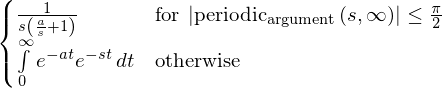

In [5]:
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

This works, but it is a bit cumbersome to have all the extra stuff in there. 

Sympy provides a functoin called `laplace_transform` which does this more efficiently. By default it will return conditions of convergence as well (recall this is an indefinite integral).

In [6]:
sympy.laplace_transform(f, t, s)

(1/(a + s), 0, True)

If we want just the function, we can specify `noconds=True`.

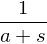

In [7]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

We will find it useful to define a quicker version of this:

In [8]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

Inverses are simple as well,

In [9]:
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [10]:
invL(F)

The unit step function is also known as the Heaviside step function. We will see this function often in inverse laplace transforms. It is typeset as $\theta(t)$ by sympy.

In [11]:
sympy.Heaviside(t)

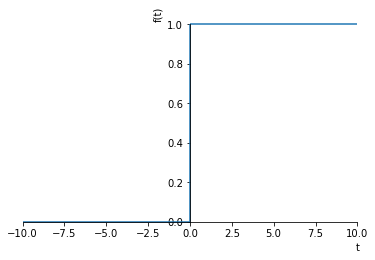

In [12]:
sympy.plot(sympy.Heaviside(t));

Look at the difference between $f$ and the inverse laplace transform we obtained, which contains the unit step to force it to zero before $t=0$.

In [13]:
invL(F).subs({a: 2})

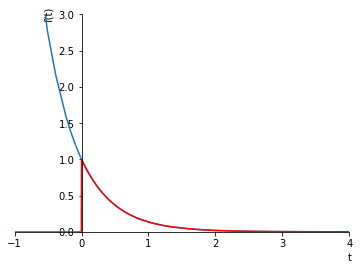

In [14]:
p = sympy.plot(f.subs({a: 2}), invL(F).subs({a: 2}), 
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

Let's see if we can match the functions in the table

In [15]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

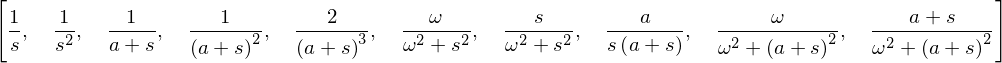

In [16]:
Fs = [L(f) for f in functions]
Fs

We can make a pretty good approximation of the table with a little help from pandas

In [17]:
from pandas import DataFrame

In [18]:
def makelatex(args):
    return ["${}$".format(sympy.latex(a)) for a in args]

In [19]:
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))

,0,1
0,$1$,$\frac{1}{s}$
1,$t$,$\frac{1}{s^{2}}$
2,$e^{- a t}$,$\frac{1}{a + s}$
3,$t e^{- a t}$,$\frac{1}{\left(a + s\right)^{2}}$
4,$t^{2} e^{- a t}$,$\frac{2}{\left(a + s\right)^{3}}$
5,$\sin{\left (\omega t \right )}$,$\frac{\omega}{\omega^{2} + s^{2}}$
6,$\cos{\left (\omega t \right )}$,$\frac{s}{\omega^{2} + s^{2}}$
7,$1 - e^{- a t}$,$\frac{a}{s \left(a + s\right)}$
8,$e^{- a t} \sin{\left (\omega t \right )}$,$\frac{\omega}{\omega^{2} + \left(a + s\right)...
9,$e^{- a t} \cos{\left (\omega t \right )}$,$\frac{a + s}{\omega^{2} + \left(a + s\right)^...


More complicated inverses
---------

Why doesn't the table feature more complicated functions? Because higher-order rational functions can be written as sums of simpler ones through application of partial fractions expansion.

In [20]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))

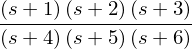

In [21]:
F

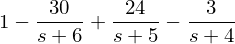

In [22]:
F.apart(s)

Even sympy can benefit from a little help sometimes. When we try to calculate the inverse of $F$ we get a bit of a nasty answer:

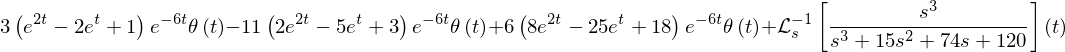

In [23]:
invL(F)

Perhaps it looks better if we simplify?

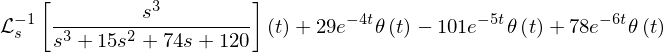

In [24]:
invL(F).simplify()

No, it still features an "unknown" laplace transform. If we do the partial fractions expansion first, we get a clean answer:

In [25]:
invL(F.apart(s))